# C PHI calculation

In [1]:
'''import the module and environment'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sys
import plotly.express as px
import math
import plotly.graph_objects as go

## Import data frame

In [2]:
'''Import data frame'''
df01 = pd.read_csv('40Kpa_use.csv', low_memory=False) #for first data frame 40Kpa
pd.set_option('display.float_format', lambda x:'%f'%x) #set on float
df02 = pd.read_csv('60Kpa_use.csv', low_memory=False) #for second data frame 60Kpa
pd.set_option('display.float_format', lambda x:'%f'%x) #set on float
df03 = pd.read_csv('80Kpa_use.csv', low_memory=False) #for third data frame 80Kpa
pd.set_option('display.float_format', lambda x:'%f'%x) #set on float

### check data frame 

In [3]:
'''dataframe 1'''
print("40Kpa")
df01

40Kpa


Axial_load  Confining_Pressure  Displesment  Pore_Pressure
0       0.990000           39.660000     1.928000       4.890000
1       1.230000           39.660000     0.032000       4.950000
2       1.620000           39.760000     0.059000       4.950000
3       1.810000           39.710000     0.085000       4.950000
4       2.160000           39.810000     0.111000       5.000000
...          ...                 ...          ...            ...
3079    5.880000           39.420000    98.163000       4.150000
3080    6.160000           40.670000    98.188000       4.200000
3081    6.350000           40.720000    98.213000       4.100000
3082    6.640000           38.940000    98.240000       4.100000
3083    6.780000           40.620000    98.264000       4.150000

[3084 rows x 4 columns]

In [4]:
'''dataframe 2'''
print("60Kpa")
df02

60Kpa


Axial_load  Confining_Pressure  Displesment  Pore_Pressure
0       1.460000           63.040000     0.000000       4.040000
1       1.590000           63.190000     0.015000       4.040000
2       1.830000           63.430000     0.042000       4.100000
3       2.270000           63.620000     0.066000       4.040000
4       2.470000           63.430000     0.083000       4.100000
...          ...                 ...          ...            ...
2867   25.890000           63.900000    80.099000       3.080000
2868   26.080000           63.950000    80.126000       3.140000
2869   26.200000           64.000000    80.151000       3.030000
2870   26.060000           64.050000    80.178000       3.140000
2871   26.310000           64.100000    80.202000       3.190000

[2872 rows x 4 columns]

In [5]:
'''dataframe 3'''
print("80Kpa")
df03

80Kpa


Axial_load  Confining_Pressure  Displesment  Pore_Pressure
0       1.090000           82.830000     3.858000       8.240000
1       1.210000           82.590000     0.024000       8.140000
2       1.400000           82.440000     0.050000       8.300000
3       1.630000           82.730000     0.078000       8.300000
4       1.670000           82.970000     0.104000       8.300000
...          ...                 ...          ...            ...
2959   37.210000           81.730000    84.811000       5.690000
2960   37.110000           82.250000    84.867000       6.170000
2961   37.040000           82.250000    84.918000       5.640000
2962   36.890000           82.400000    84.979000       6.060000
2963   36.710000           82.060000    85.015000       5.320000

[2964 rows x 4 columns]

## Redundant data 

In [6]:
sub1=df01.copy()
sub2=df02.copy()
sub3=df03.copy()

## setup the parameter and cal parameter

In [7]:
"""setting the parameter"""
'''H = 0.6 and D = 0.3'''
H=0.6
D=0.3
A0=(np.pi*D**2)/4
print(A0)

0.07068583470577035


In [8]:
'''calculate the Axial Strain'''
sub1['Axial_Strain']=(sub1['Displesment']*0.001)/H #for data 40Kpa
sub2['Axial_Strain']=(sub2['Displesment']*0.001)/H #for data 60Kpa
sub3['Axial_Strain']=(sub3['Displesment']*0.001)/H #for data 80Kpa
#print('40Kpa'+'\n')
#print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))


60Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain
0    1.460000           63.040000     0.000000       4.040000      0.000000
1    1.590000           63.190000     0.015000       4.040000      0.000025
2    1.830000           63.430000     0.042000       4.100000      0.000070
3    2.270000           63.620000     0.066000       4.040000      0.000110
4    2.470000           63.430000     0.083000       4.100000      0.000138

80Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain
0    1.090000           82.830000     3.858000       8.240000      0.006430
1    1.210000           82.590000     0.024000       8.140000      0.000040
2    1.400000           82.440000     0.050000       8.300000      0.000083
3    1.630000           82.730000     0.078000       8.300000      0.000130
4    1.670000           82.970000     0.104000       8.300000      0.000173


In [9]:
'''calculate the Corrected Area'''
sub1['Corrected_Area']=A0/(1-sub1['Axial_Strain']) #for data 40Kpa
sub2['Corrected_Area']=A0/(1-sub2['Axial_Strain']) #for data 60Kpa
sub3['Corrected_Area']=A0/(1-sub3['Axial_Strain']) #for data 80Kpa
#print('40Kpa'+'\n')
#print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))


60Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    1.460000           63.040000     0.000000       4.040000      0.000000   
1    1.590000           63.190000     0.015000       4.040000      0.000025   
2    1.830000           63.430000     0.042000       4.100000      0.000070   
3    2.270000           63.620000     0.066000       4.040000      0.000110   
4    2.470000           63.430000     0.083000       4.100000      0.000138   

   Corrected_Area  
0        0.070686  
1        0.070688  
2        0.070691  
3        0.070694  
4        0.070696  

80Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    1.090000           82.830000     3.858000       8.240000      0.006430   
1    1.210000           82.590000     0.024000       8.140000      0.000040   
2    1.400000           82.440000     0.050000       8.300000      0.000083   
3    1.630000           82.730000     0.078000       8.300000      0.0001

In [10]:
'''calculate the Axial Stress'''
sub1['Axial_Stress']=sub1['Axial_load']/sub1['Corrected_Area'] #for data 40Kpa
sub2['Axial_Stress']=sub2['Axial_load']/sub2['Corrected_Area'] #for data 60Kpa
sub3['Axial_Stress']=sub3['Axial_load']/sub3['Corrected_Area'] #for data 80Kpa
print('40Kpa'+'\n')
print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))

40Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    0.990000           39.660000     1.928000       4.890000      0.003213   
1    1.230000           39.660000     0.032000       4.950000      0.000053   
2    1.620000           39.760000     0.059000       4.950000      0.000098   
3    1.810000           39.710000     0.085000       4.950000      0.000142   
4    2.160000           39.810000     0.111000       5.000000      0.000185   

   Corrected_Area  Axial_Stress  
0        0.070914     13.960630  
1        0.070690     17.400012  
2        0.070693     22.916058  
3        0.070696     25.602634  
4        0.070699     30.552096  

60Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    1.460000           63.040000     0.000000       4.040000      0.000000   
1    1.590000           63.190000     0.015000       4.040000      0.000025   
2    1.830000           63.430000     0.042000       4.100000      0.

In [11]:
'''calculate the Major'''
sub1['Major']=sub1['Confining_Pressure']+sub1['Axial_Stress'] #for data 40Kpa
sub2['Major']=sub2['Confining_Pressure']+sub2['Axial_Stress'] #for data 60Kpa
sub3['Major']=sub3['Confining_Pressure']+sub3['Axial_Stress'] #for data 80Kpa
print('40Kpa'+'\n')
print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))

40Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    0.990000           39.660000     1.928000       4.890000      0.003213   
1    1.230000           39.660000     0.032000       4.950000      0.000053   
2    1.620000           39.760000     0.059000       4.950000      0.000098   
3    1.810000           39.710000     0.085000       4.950000      0.000142   
4    2.160000           39.810000     0.111000       5.000000      0.000185   

   Corrected_Area  Axial_Stress     Major  
0        0.070914     13.960630 53.620630  
1        0.070690     17.400012 57.060012  
2        0.070693     22.916058 62.676058  
3        0.070696     25.602634 65.312634  
4        0.070699     30.552096 70.362096  

60Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    1.460000           63.040000     0.000000       4.040000      0.000000   
1    1.590000           63.190000     0.015000       4.040000      0.000025   
2    1.83

In [12]:
'''calculate the Effective Major'''
sub1['Effective_Major']=sub1['Axial_Stress']+(sub1['Confining_Pressure']-sub1['Pore_Pressure']) #for data 40Kpa
sub2['Effective_Major']=sub2['Axial_Stress']+(sub2['Confining_Pressure']-sub2['Pore_Pressure']) #for data 60Kpa
sub3['Effective_Major']=sub3['Axial_Stress']+(sub3['Confining_Pressure']-sub3['Pore_Pressure']) #for data 80Kpa
print('40Kpa'+'\n')
print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))

40Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    0.990000           39.660000     1.928000       4.890000      0.003213   
1    1.230000           39.660000     0.032000       4.950000      0.000053   
2    1.620000           39.760000     0.059000       4.950000      0.000098   
3    1.810000           39.710000     0.085000       4.950000      0.000142   
4    2.160000           39.810000     0.111000       5.000000      0.000185   

   Corrected_Area  Axial_Stress     Major  Effective_Major  
0        0.070914     13.960630 53.620630        48.730630  
1        0.070690     17.400012 57.060012        52.110012  
2        0.070693     22.916058 62.676058        57.726058  
3        0.070696     25.602634 65.312634        60.362634  
4        0.070699     30.552096 70.362096        65.362096  

60Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    1.460000           63.040000     0.000000       4.040000    

In [13]:
'''recalculate the Deviator Stress'''
"""for ploting the stress strain graph"""
sub1['Deviator_Stress']=sub1['Axial_Stress']- sub1['Axial_Stress'].min(skipna=False)#for data 40Kpa
sub2['Deviator_Stress']=sub2['Axial_Stress']- sub2['Axial_Stress'].min(skipna=False)#for data 60Kpa
sub3['Deviator_Stress']=sub3['Axial_Stress']- sub3['Axial_Stress'].min(skipna=False)#for data 80Kpa
print('40Kpa'+'\n')
print(sub1.head(5))
print('\n'+'60Kpa'+'\n')
print(sub2.head(5))
print('\n'+'80Kpa'+'\n')
print(sub3.head(5))

40Kpa

   Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
0    0.990000           39.660000     1.928000       4.890000      0.003213   
1    1.230000           39.660000     0.032000       4.950000      0.000053   
2    1.620000           39.760000     0.059000       4.950000      0.000098   
3    1.810000           39.710000     0.085000       4.950000      0.000142   
4    2.160000           39.810000     0.111000       5.000000      0.000185   

   Corrected_Area  Axial_Stress     Major  Effective_Major  Deviator_Stress  
0        0.070914     13.960630 53.620630        48.730630         0.000000  
1        0.070690     17.400012 57.060012        52.110012         3.439382  
2        0.070693     22.916058 62.676058        57.726058         8.955428  
3        0.070696     25.602634 65.312634        60.362634        11.642004  
4        0.070699     30.552096 70.362096        65.362096        16.591466  

60Kpa

   Axial_load  Confining_Pressure  Disples

### ---------End of the preparing the data----------

## find the max and min

In [14]:
'''data frame 1'''
print('maximum for 40 Kpa'+'\n')
print(sub1.apply(np.max)) #find max
print('\n'+'Minimum for 40 Kpa'+'\n')
print(sub1.apply(np.min)) #find min
print('\n''-----end of the report-----')

maximum for 40 Kpa

Axial_load            18.620000
Confining_Pressure    41.530000
Displesment           98.264000
Pore_Pressure          5.370000
Axial_Strain           0.163773
Corrected_Area         0.084530
Axial_Stress         253.673731
Major                294.393731
Effective_Major      291.043731
Deviator_Stress      239.713101
dtype: float64

Minimum for 40 Kpa

Axial_load            0.990000
Confining_Pressure   38.610000
Displesment           0.032000
Pore_Pressure        -3.400000
Axial_Strain          0.000053
Corrected_Area        0.070690
Axial_Stress         13.960630
Major                53.620630
Effective_Major      48.730630
Deviator_Stress       0.000000
dtype: float64

-----end of the report-----


In [15]:
'''data frame 1'''
print('maximum for 60 Kpa'+'\n')
print(sub2.apply(np.max)) #find max
print('\n'+'Minimum for 60 Kpa'+'\n')
print(sub2.apply(np.min)) #find min
print('\n''-----end of the report-----')

maximum for 60 Kpa

Axial_load            32.350000
Confining_Pressure    64.530000
Displesment           80.202000
Pore_Pressure          4.310000
Axial_Strain           0.133670
Corrected_Area         0.081592
Axial_Stress         429.712552
Major                493.119994
Effective_Major      490.189994
Deviator_Stress      409.057777
dtype: float64

Minimum for 60 Kpa

Axial_load            1.460000
Confining_Pressure   61.800000
Displesment           0.000000
Pore_Pressure        -3.830000
Axial_Strain          0.000000
Corrected_Area        0.070686
Axial_Stress         20.654775
Major                83.694775
Effective_Major      79.654775
Deviator_Stress       0.000000
dtype: float64

-----end of the report-----


In [16]:
'''data frame 1'''
print('maximum for 80 Kpa'+'\n')
print(sub3.apply(np.max)) #find max
print('\n'+'Minimum for 80 Kpa'+'\n')
print(sub3.apply(np.min)) #find min
print('\n''-----end of the report-----')

maximum for 80 Kpa

Axial_load            38.820000
Confining_Pressure    84.600000
Displesment           85.015000
Pore_Pressure          9.410000
Axial_Strain           0.141692
Corrected_Area         0.082355
Axial_Stress         485.482593
Major                568.402593
Effective_Major      562.072593
Deviator_Stress      470.161400
dtype: float64

Minimum for 80 Kpa

Axial_load            1.090000
Confining_Pressure   81.250000
Displesment           0.024000
Pore_Pressure         5.320000
Axial_Strain          0.000040
Corrected_Area        0.070689
Axial_Stress         15.321193
Major                98.151193
Effective_Major      89.911193
Deviator_Stress       0.000000
dtype: float64

-----end of the report-----


In [17]:
sub1.describe()


Axial_load  Confining_Pressure  Displesment  Pore_Pressure  \
count 3084.000000         3084.000000  3084.000000    3084.000000   
mean    14.104598           40.108090    47.687610       3.265590   
std      2.409948            0.556910    28.914606       1.239075   
min      0.990000           38.610000     0.032000      -3.400000   
25%     12.750000           39.660000    22.392000       3.190000   
50%     14.025000           40.140000    47.643000       3.350000   
75%     15.840000           40.570000    72.506500       3.620000   
max     18.620000           41.530000    98.264000       5.370000   

       Axial_Strain  Corrected_Area  Axial_Stress       Major  \
count   3084.000000     3084.000000   3084.000000 3084.000000   
mean       0.079479        0.077001    183.946100  224.054190   
std        0.048191        0.004055     35.148088   35.186234   
min        0.000053        0.070690     13.960630   53.620630   
25%        0.037320        0.073426    162.358873  202.515515   
50%        0.079405        0.076783    175.321317  215.608312   
75%        0.120844        0.080402    212.750235  252.832602   
max        0.163773        0.084530    253.673731  294.393731   

       Effective_Major  Deviator_Stress  
count      3084.000000      3084.000000  
mean        220.788600       169.985470  
std          35.657567        35.148088  
min          48.730630         0.000000  
25%         199.046620       148.398243  
50%         212.219452       161.360687  
75%         250.623150       198.789604  
max         291.043731       239.713101

In [18]:
sub2.describe()

Axial_load  Confining_Pressure  Displesment  Pore_Pressure  \
count 2872.000000         2872.000000  2872.000000    2872.000000   
mean    25.890108           63.299373    35.162786       3.082925   
std      5.657440            0.322436    23.811158       1.028101   
min      1.460000           61.800000     0.000000      -3.830000   
25%     24.275000           63.140000    14.300500       2.870000   
50%     27.195000           63.330000    33.302000       3.080000   
75%     30.112500           63.520000    55.530750       3.780000   
max     32.350000           64.530000    80.202000       4.310000   

       Axial_Strain  Corrected_Area  Axial_Stress       Major  \
count   2872.000000     2872.000000   2872.000000 2872.000000   
mean       0.058605        0.075221    343.120547  406.419921   
std        0.039685        0.003203     71.655442   71.673857   
min        0.000000        0.070686     20.654775   83.694775   
25%        0.023834        0.072412    318.263347  381.518591   
50%        0.055503        0.074840    360.727177  424.028372   
75%        0.092551        0.077895    399.862269  463.104662   
max        0.133670        0.081592    429.712552  493.119994   

       Effective_Major  Deviator_Stress  
count      2872.000000      2872.000000  
mean        403.336996       322.465772  
std          72.140932        71.655442  
min          79.654775         0.000000  
25%         378.105642       297.608573  
50%         421.632959       340.072403  
75%         460.991899       379.207494  
max         490.189994       409.057777

In [19]:
sub3.describe()

Axial_load  Confining_Pressure  Displesment  Pore_Pressure  \
count 2964.000000         2964.000000  2964.000000    2964.000000   
mean    30.833667           83.047709    41.264277       7.417588   
std      8.218631            0.473711    24.719119       0.804146   
min      1.090000           81.250000     0.024000       5.320000   
25%     28.285000           82.730000    19.554750       6.750000   
50%     33.425000           83.110000    40.527000       7.450000   
75%     36.680000           83.400000    63.003500       8.190000   
max     38.820000           84.600000    85.015000       9.410000   

       Axial_Strain  Corrected_Area  Axial_Stress       Major  \
count   2964.000000     2964.000000   2964.000000 2964.000000   
mean       0.068774        0.076056    402.197689  485.245398   
std        0.041199        0.003381     98.232947   98.289315   
min        0.000040        0.070689     15.321193   98.151193   
25%        0.032591        0.073067    385.418126  468.855626   
50%        0.067545        0.075806    442.221220  525.189257   
75%        0.105006        0.078979    461.118232  544.137250   
max        0.141692        0.082355    485.482593  568.402593   

       Effective_Major  Deviator_Stress  
count      2964.000000      2964.000000  
mean        477.827811       386.876497  
std          98.810220        98.232947  
min          89.911193         0.000000  
25%         460.615626       370.096933  
50%         518.089420       426.900027  
75%         537.550430       445.797039  
max         562.072593       470.161400

In [20]:
fig = px.scatter(sub1, x="Axial_Strain", y="Deviator_Stress", trendline="ols",
              labels={"Axial_Strain": "Axial Strain (%)", "Deviator_Stress": "Deviator Stress(Kpa)"}, 
              title="40 Kpa")
fig.update_traces(mode='lines+markers',
    marker=dict({'size': 3})) 
fig.update_yaxes(rangemode="tozero")
fig.update_xaxes(rangemode="tozero")
fig.show()

/Users/theeradonsomsri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/theeradonsomsri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Text(0, 0.5, 'Deviator Stress(Kpa)')

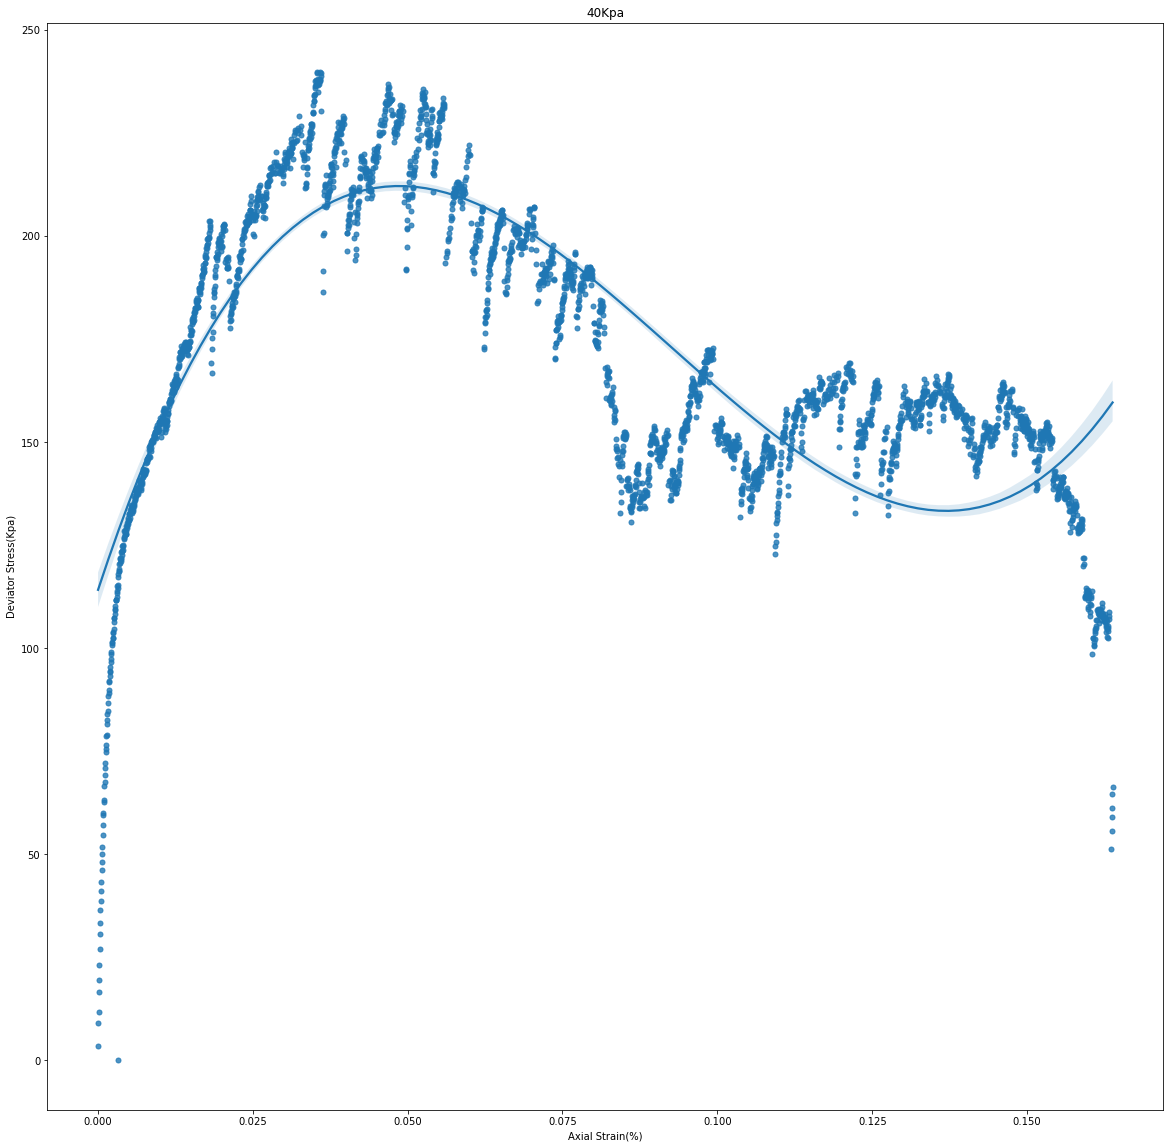

In [62]:
import seaborn as sns
plt.figure(figsize=(20, 20))
scat1 = sns.regplot(x="Axial_Strain", y="Deviator_Stress", order=3, data=sub1, scatter_kws={"s": 25})
plt.title('40Kpa')
plt.xlabel('Axial Strain(%)')
plt.ylabel('Deviator Stress(Kpa)')

In [22]:
reg2 = smf.ols('Axial_Strain ~  I(Deviator_Stress**2)', data=sub1).fit()
print (reg2.summary())
'''
@inproceedings{seabold2010statsmodels,
  title={statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}
'''

                            OLS Regression Results                            
Dep. Variable:           Axial_Strain   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     786.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          2.30e-154
Time:                        10:03:51   Log-Likelihood:                 5327.5
No. Observations:                3084   AIC:                        -1.065e+04
Df Residuals:                    3082   BIC:                        -1.064e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

'\n@inproceedings{seabold2010statsmodels,\n  title={statsmodels: Econometric and statistical modeling with python},\n  author={Seabold, Skipper and Perktold, Josef},\n  booktitle={9th Python in Science Conference},\n  year={2010},\n}\n'

In [23]:
fp1=sub1.copy()
fp1.loc[fp1['Deviator_Stress'] == fp1['Deviator_Stress'].max(skipna=False)]




Axial_load  Confining_Pressure  Displesment  Pore_Pressure  Axial_Strain  \
734   18.590000           40.720000    21.265000       3.350000      0.035442   

     Corrected_Area  Axial_Stress      Major  Effective_Major  Deviator_Stress  
734        0.073283    253.673731 294.393731       291.043731       239.713101

In [24]:
fig = px.scatter(sub2, x="Axial_Strain", y="Deviator_Stress", trendline="ols",
              labels={"Axial_Strain": "Axial Strain (%)", "Deviator_Stress": "Deviator Stress(Kpa)"}, 
              title="60 Kpa")
fig.update_traces(mode='lines+markers',
    marker=dict({'size': 3})) 
fig.update_yaxes(rangemode="tozero")
fig.update_xaxes(rangemode="tozero")
fig.show()

Text(0, 0.5, 'Deviator Stress(Kpa)')

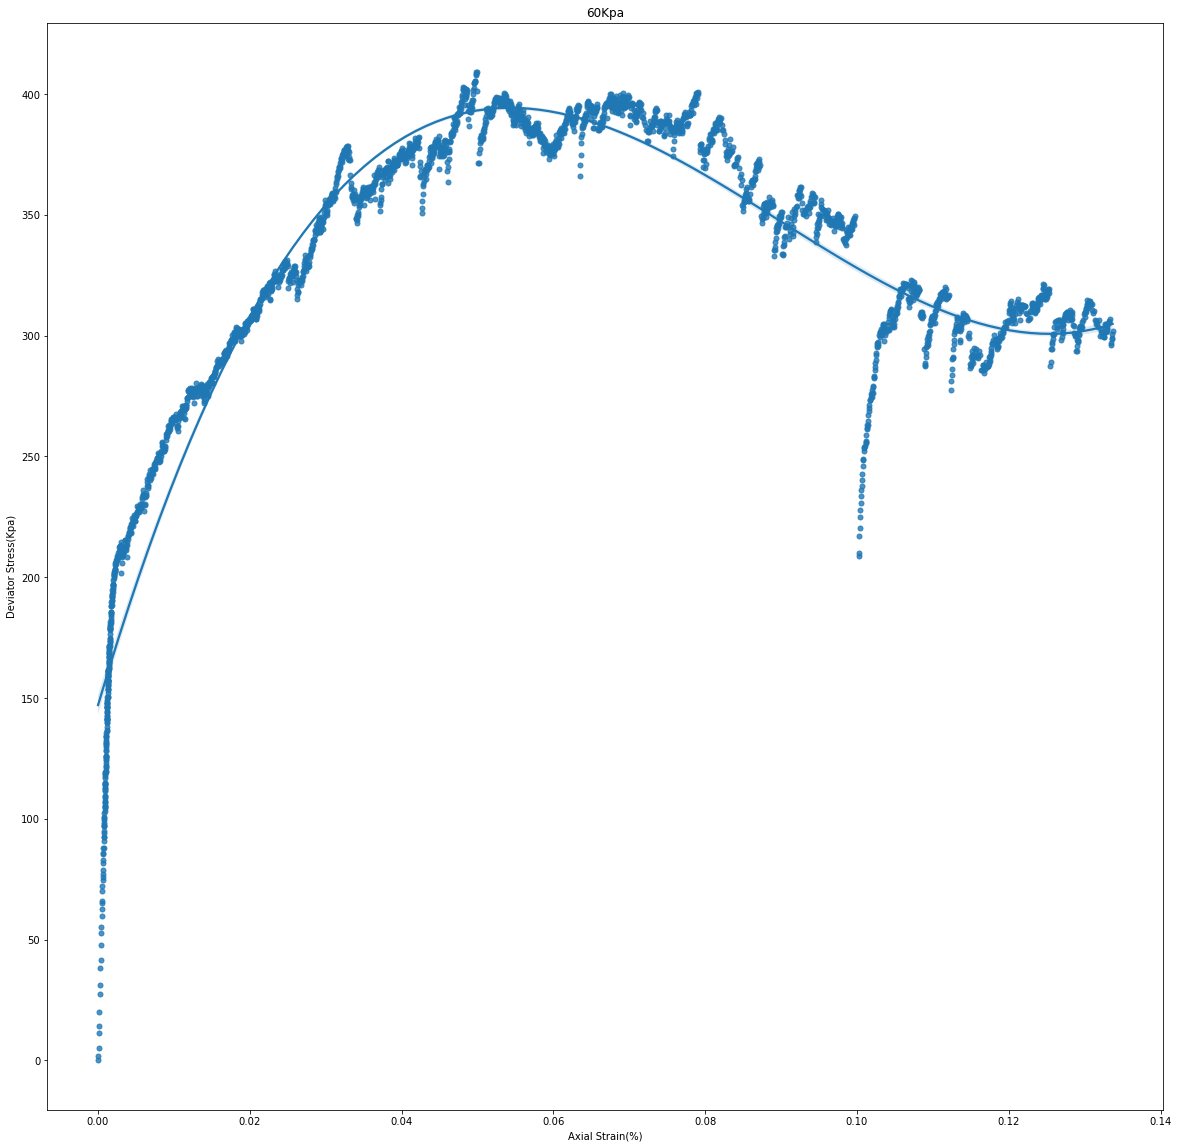

In [61]:
import seaborn as sns
plt.figure(figsize=(20, 20))
scat1 = sns.regplot(x="Axial_Strain", y="Deviator_Stress", order=3, data=sub2, scatter_kws={"s": 25})
plt.title('60Kpa')
plt.xlabel('Axial Strain(%)')
plt.ylabel('Deviator Stress(Kpa)')

In [26]:
reg2 = smf.ols('Axial_Strain ~  I(Deviator_Stress**2)', data=sub2).fit()
print (reg2.summary())


'''
@inproceedings{seabold2010statsmodels,
  title={statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}
'''

                            OLS Regression Results                            
Dep. Variable:           Axial_Strain   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     347.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           3.06e-73
Time:                        10:03:54   Log-Likelihood:                 5356.6
No. Observations:                2872   AIC:                        -1.071e+04
Df Residuals:                    2870   BIC:                        -1.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

'\n@inproceedings{seabold2010statsmodels,\n  title={statsmodels: Econometric and statistical modeling with python},\n  author={Seabold, Skipper and Perktold, Josef},\n  booktitle={9th Python in Science Conference},\n  year={2010},\n}\n'

In [27]:
fp2=sub2.copy()
fp2.loc[fp2['Deviator_Stress'] == fp2['Deviator_Stress'].max(skipna=False)]

Axial_load  Confining_Pressure  Displesment  Pore_Pressure  \
1309   31.970000           63.230000    29.942000       3.350000   

      Axial_Strain  Corrected_Area  Axial_Stress      Major  Effective_Major  \
1309      0.049903        0.074399    429.712552 492.942552       489.592552   

      Deviator_Stress  
1309       409.057777

In [28]:
fig = px.scatter(sub3, x="Axial_Strain", y="Deviator_Stress", trendline="ols",
              labels={"Axial_Strain": "Axial Strain (%)", "Deviator_Stress": "Deviator Stress(Kpa)"}, 
              title="80 Kpa")
fig.update_traces(mode='lines+markers',
    marker=dict({'size': 3})) 
fig.update_yaxes(rangemode="tozero")
fig.update_xaxes(rangemode="tozero")
fig.show()

Text(0, 0.5, 'Deviator Stress(Kpa)')

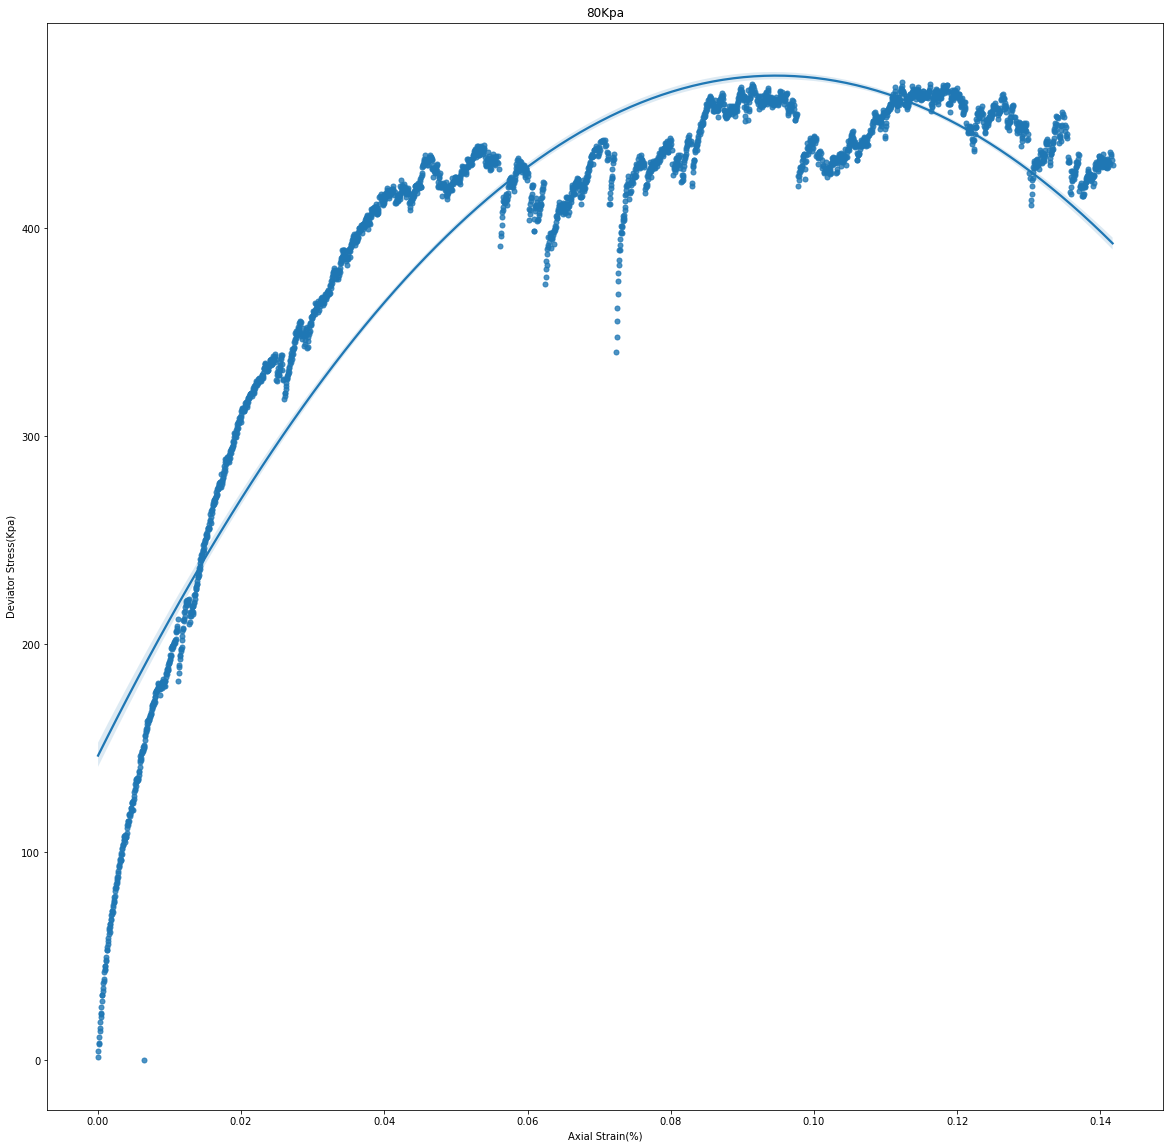

In [63]:
import seaborn as sns
plt.figure(figsize=(20, 20))
scat1 = sns.regplot(x="Axial_Strain", y="Deviator_Stress", order=2, data=sub3, scatter_kws={"s": 25})
plt.title('80Kpa')
plt.xlabel('Axial Strain(%)')
plt.ylabel('Deviator Stress(Kpa)')

In [30]:
reg2 = smf.ols('Axial_Strain ~  I(Deviator_Stress**2)', data=sub3).fit()
print (reg2.summary())


'''
@inproceedings{seabold2010statsmodels,
  title={statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}
'''

                            OLS Regression Results                            
Dep. Variable:           Axial_Strain   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     5676.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:03:56   Log-Likelihood:                 6834.1
No. Observations:                2964   AIC:                        -1.366e+04
Df Residuals:                    2962   BIC:                        -1.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

'\n@inproceedings{seabold2010statsmodels,\n  title={statsmodels: Econometric and statistical modeling with python},\n  author={Seabold, Skipper and Perktold, Josef},\n  booktitle={9th Python in Science Conference},\n  year={2010},\n}\n'

In [31]:
fp3=sub3.copy()
fp3.loc[fp3['Deviator_Stress'] == fp3['Deviator_Stress'].max(skipna=False)]

Axial_load  Confining_Pressure  Displesment  Pore_Pressure  \
2377   38.660000           82.920000    67.407000       6.330000   

      Axial_Strain  Corrected_Area  Axial_Stress      Major  Effective_Major  \
2377      0.112345        0.079632    485.482593 568.402593       562.072593   

      Deviator_Stress  
2377       470.161400

## Finding peak

## plot the first graph

### data frame1(40Kpa)

In [32]:
df_peak1=pd.DataFrame({"Finding peak":['Total','Effective']})
df_peak1

Finding peak
0        Total
1    Effective

In [33]:
df_peak1['ea']=''
df_peak1['σ3']=''
df_peak1['σ1']=''
df_peak1

Finding peak ea σ3 σ1
0        Total         
1    Effective

In [34]:
'''set the index'''
df_peak1.set_index('Finding peak',inplace= True)
df_peak1

ea σ3 σ1
Finding peak         
Total                
Effective

In [35]:
#Data mapping
print('Maximum')
print(sub1['Axial_load'].max(skipna=False))
df_peak1.at['Total', 'ea'] = sub1['Axial_Strain'].max(skipna = False) #mapping the total ea
df_peak1.at['Total', 'σ3'] = sub1['Confining_Pressure'].max(skipna=False) #mapping the total s3
df_peak1.at['Total', 'σ1'] = sub1['Effective_Major'].max(skipna=False) #mapping the total s1
df_peak1.at['Effective', 'ea'] = sub1['Axial_Strain'].max(skipna=False) #mapping the effective ea
df_peak1.at['Effective', 'σ3'] = sub1['Confining_Pressure'].max(skipna=False) - sub1['Pore_Pressure'].max(skipna=False) #mapping the effective s3
df_peak1.at['Effective', 'σ1'] = sub1['Effective_Major'].max(skipna=False) - sub1['Pore_Pressure'].max(skipna=False) #mapping the effective s1
df_peak1

Maximum
18.62


ea        σ3         σ1
Finding peak                              
Total        0.163773 41.530000 291.043731
Effective    0.163773 36.160000 285.673731

### ----------End of the data frame 1(40Kpa)----------

### data frame 2(60Kpa)

In [36]:
'''set the environment as same as frame 1'''
df_peak2=pd.DataFrame({"Finding peak":['Total','Effective']})
df_peak2['ea']=''
df_peak2['σ3']=''
df_peak2['σ1']=''
df_peak2.set_index('Finding peak',inplace= True)
df_peak2

ea σ3 σ1
Finding peak         
Total                
Effective

In [37]:
#Data mapping
print('Maximum')
print(sub2['Axial_load'].max(skipna=False))
df_peak2.at['Total', 'ea'] = sub2['Axial_Strain'].max(skipna = False) #mapping the total ea
df_peak2.at['Total', 'σ3'] = sub2['Confining_Pressure'].max(skipna=False) #mapping the total s3
df_peak2.at['Total', 'σ1'] = sub2['Effective_Major'].max(skipna=False) #mapping the total s1
df_peak2.at['Effective', 'ea'] = sub2['Axial_Strain'].max(skipna=False) #mapping the effective ea
df_peak2.at['Effective', 'σ3'] = sub2['Confining_Pressure'].max(skipna=False) - sub2['Pore_Pressure'].max(skipna=False) #mapping the effective s3
df_peak2.at['Effective', 'σ1'] = sub2['Effective_Major'].max(skipna=False) - sub2['Pore_Pressure'].max(skipna=False) #mapping the effective s1
df_peak2

Maximum
32.35


ea        σ3         σ1
Finding peak                              
Total        0.133670 64.530000 490.189994
Effective    0.133670 60.220000 485.879994

### ----------End of the data frame 2(60Kpa)------------

### data fram3(80Kpa)

In [38]:
'''set the environment as same as frame 1'''
df_peak3=pd.DataFrame({"Finding peak":['Total','Effective']})
df_peak3['ea']=''
df_peak3['σ3']=''
df_peak3['σ1']=''
df_peak3.set_index('Finding peak',inplace= True)
df_peak3

ea σ3 σ1
Finding peak         
Total                
Effective

In [39]:
#Data mapping
print('Maximum')
print(sub3['Axial_load'].max(skipna=False))
df_peak3.at['Total', 'ea'] = sub3['Axial_Strain'].max(skipna = False) #mapping the total ea
df_peak3.at['Total', 'σ3'] = sub3['Confining_Pressure'].max(skipna=False) #mapping the total s3
df_peak3.at['Total', 'σ1'] = sub3['Effective_Major'].max(skipna=False) #mapping the total s1
df_peak3.at['Effective', 'ea'] = sub3['Axial_Strain'].max(skipna=False) #mapping the effective ea
df_peak3.at['Effective', 'σ3'] = sub3['Confining_Pressure'].max(skipna=False) - sub3['Pore_Pressure'].max(skipna=False) #mapping the effective s3
df_peak3.at['Effective', 'σ1'] = sub3['Effective_Major'].max(skipna=False) - sub3['Pore_Pressure'].max(skipna=False) #mapping the effective s1
df_peak3

Maximum
38.82


ea        σ3         σ1
Finding peak                              
Total        0.141692 84.600000 562.072593
Effective    0.141692 75.190000 552.662593

### ----------End of the data frame 2(80Kpa)------------ 

### summarize peak

In [40]:
#print('40Kpa')
#print('Maximum')
#print(sub1['Axial_load'].max(skipna=False))
#print(df_peak1)
#print('----------End of report data1(40Kpa)----------')
print('\n'+'60Kpa')
print('Maximum')
print(sub2['Axial_load'].max(skipna=False))
print(df_peak2)
print('----------End of report data1(60Kpa)----------')
print('\n'+'80Kpa')
print('Maximum')
print(sub3['Axial_load'].max(skipna=False))
print(df_peak3)
print('----------End of report data1(80Kpa)----------')


60Kpa
Maximum
32.35
                   ea        σ3         σ1
Finding peak                              
Total        0.133670 64.530000 490.189994
Effective    0.133670 60.220000 485.879994
----------End of report data1(60Kpa)----------

80Kpa
Maximum
38.82
                   ea        σ3         σ1
Finding peak                              
Total        0.141692 84.600000 562.072593
Effective    0.141692 75.190000 552.662593
----------End of report data1(80Kpa)----------


## End of the finding peak

## ploting the circle graph (Effective)

In [41]:
df_conclude=pd.DataFrame({"data":['40Kpa','60Kpa', '80Kpa']})
df_conclude['σ1']=''
df_conclude['σ3']=''
df_conclude['(σ1-σ3)/2']=''
df_conclude['(σ1+σ3)/2']=''
df_conclude.set_index('data',inplace= True)
df_conclude

σ1 σ3 (σ1-σ3)/2 (σ1+σ3)/2
data                           
40Kpa                          
60Kpa                          
80Kpa

In [42]:
df_conclude.at['40Kpa', 'σ1'] = df_peak1.at['Effective', 'σ1']
df_conclude.at['60Kpa', 'σ1'] = df_peak2.at['Effective', 'σ1']
df_conclude.at['80Kpa', 'σ1'] = df_peak3.at['Effective', 'σ1']
df_conclude.at['40Kpa', 'σ3'] = df_peak1.at['Effective', 'σ3']
df_conclude.at['60Kpa', 'σ3'] = df_peak2.at['Effective', 'σ3']
df_conclude.at['80Kpa', 'σ3'] = df_peak3.at['Effective', 'σ3']
df_conclude

σ1        σ3 (σ1-σ3)/2 (σ1+σ3)/2
data                                          
40Kpa 285.673731 36.160000                    
60Kpa 485.879994 60.220000                    
80Kpa 552.662593 75.190000

In [43]:
df_conclude.at['40Kpa', '(σ1-σ3)/2'] = (df_conclude.at['40Kpa', 'σ1']-df_conclude.at['40Kpa', 'σ3'])/2
df_conclude.at['60Kpa', '(σ1-σ3)/2'] = (df_conclude.at['60Kpa', 'σ1']-df_conclude.at['60Kpa', 'σ3'])/2
df_conclude.at['80Kpa', '(σ1-σ3)/2'] = (df_conclude.at['80Kpa', 'σ1']-df_conclude.at['80Kpa', 'σ3'])/2
df_conclude.at['40Kpa', '(σ1+σ3)/2'] = (df_conclude.at['40Kpa', 'σ1']+df_conclude.at['40Kpa', 'σ3'])/2
df_conclude.at['60Kpa', '(σ1+σ3)/2'] = (df_conclude.at['60Kpa', 'σ1']+df_conclude.at['60Kpa', 'σ3'])/2
df_conclude.at['80Kpa', '(σ1+σ3)/2'] = (df_conclude.at['80Kpa', 'σ1']+df_conclude.at['80Kpa', 'σ3'])/2
df_conclude

σ1        σ3  (σ1-σ3)/2  (σ1+σ3)/2
data                                            
40Kpa 285.673731 36.160000 124.756865 160.916865
60Kpa 485.879994 60.220000 212.829997 273.049997
80Kpa 552.662593 75.190000 238.736296 313.926296

In [44]:
df_circle = pd.read_csv('circle_template.csv', low_memory=False) #for first data frame 40Kpa
pd.set_option('display.float_format', lambda x:'%f'%x) #set on float
df_circle

Angle
0        0
1        1
2        2
3        3
4        4
..     ...
177    177
178    178
179    179
180    180
181    181

[182 rows x 1 columns]

In [45]:
df_circle['σn(40Kpa)']=df_conclude.at['40Kpa', '(σ1+σ3)/2']+df_conclude.at['40Kpa', '(σ1-σ3)/2']*np.cos(df_circle['Angle']*np.pi/180)
df_circle['tn(40Kpa)']=df_conclude.at['40Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle['Angle'])
df_circle['σn(60Kpa)']=df_conclude.at['60Kpa', '(σ1+σ3)/2']+df_conclude.at['60Kpa', '(σ1-σ3)/2']*np.cos(df_circle['Angle']*np.pi/180)
df_circle['tn(60Kpa)']=df_conclude.at['60Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle['Angle'])
df_circle['σn(80Kpa)']=df_conclude.at['80Kpa', '(σ1+σ3)/2']+df_conclude.at['80Kpa', '(σ1-σ3)/2']*np.cos(df_circle['Angle']*np.pi/180)
df_circle['tn(80Kpa)']=df_conclude.at['80Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle['Angle'])
df_circle

Angle  σn(40Kpa)  tn(40Kpa)  σn(60Kpa)  tn(60Kpa)  σn(80Kpa)  tn(80Kpa)
0        0 285.673731   0.000000 485.879994   0.000000 552.662593   0.000000
1        1 285.654730   2.177308 485.847579   3.714396 552.626232   4.166523
2        2 285.597732   4.353952 485.750344   7.427660 552.517161   8.331777
3        3 285.502756   6.529270 485.588318  11.138661 552.335413  12.494492
4        4 285.369830   8.702599 485.361551  14.846270 552.081043  16.653402
..     ...        ...        ...        ...        ...        ...        ...
177    177  36.330975   6.529270  60.511676  11.138661  75.517180  12.494492
178    178  36.235999   4.353952  60.349650   7.427660  75.335432   8.331777
179    179  36.179001   2.177308  60.252415   3.714396  75.226361   4.166523
180    180  36.160000   0.000000  60.220000   0.000000  75.190000   0.000000
181    181  36.179001  -2.177308  60.252415  -3.714396  75.226361  -4.166523

[182 rows x 7 columns]

In [46]:
df_circle.describe()

Angle  σn(40Kpa)  tn(40Kpa)  σn(60Kpa)  tn(60Kpa)  σn(80Kpa)  \
count 182.000000 182.000000 182.000000 182.000000 182.000000 182.000000   
mean   90.500000 160.231493  78.535953 271.880780 133.979053 312.614758   
std    52.683014  88.941694  39.207091 151.730812  66.885658 170.199937   
min     0.000000  36.160000  -2.177308  60.220000  -3.714396  75.190000   
25%    45.250000  71.555825  46.734744 120.603798  79.727520 142.923893   
50%    90.500000 159.828212  87.439913 271.192799 149.168837 311.843035   
75%   135.750000 248.745035 114.839300 422.881183 195.911045 481.995379   
max   181.000000 285.673731 124.756865 485.879994 212.829997 552.662593   

       tn(80Kpa)  
count 182.000000  
mean  150.287381  
std    75.027179  
min    -4.166523  
25%    89.432191  
50%   167.326110  
75%   219.757919  
max   238.736296

In [47]:
import plotly.graph_objects as go


# Create figure
fig = go.Figure()


fig.add_trace(
    go.Scatter(
        x=df_circle['σn(40Kpa)'], 
        y=df_circle['tn(40Kpa)'],
        mode="lines",
        name="40Kpa",
        line=dict(
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=df_circle['σn(60Kpa)'], 
        y=df_circle['tn(60Kpa)'],
        mode="lines",
        name="60Kpa",
        line=dict(
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=df_circle['σn(80Kpa)'], 
        y=df_circle['tn(80Kpa)'],
        mode="lines",
        name="80Kpa",
        line=dict(
        )
    )
)


# Add figure title
fig.update_layout(
    title_text="tricircle visualize",
    
)

# Set x-axis title
fig.update_xaxes(title_text="σn")

# Set y-axes titles
fig.update_yaxes(title_text="tn")

fig.update_xaxes(range=[0, 600])
fig.update_yaxes(range=[0, 600])

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

fig.update_xaxes(tick0=10, dtick=10)
fig.update_yaxes(tick0=10, dtick=10)


fig.show()

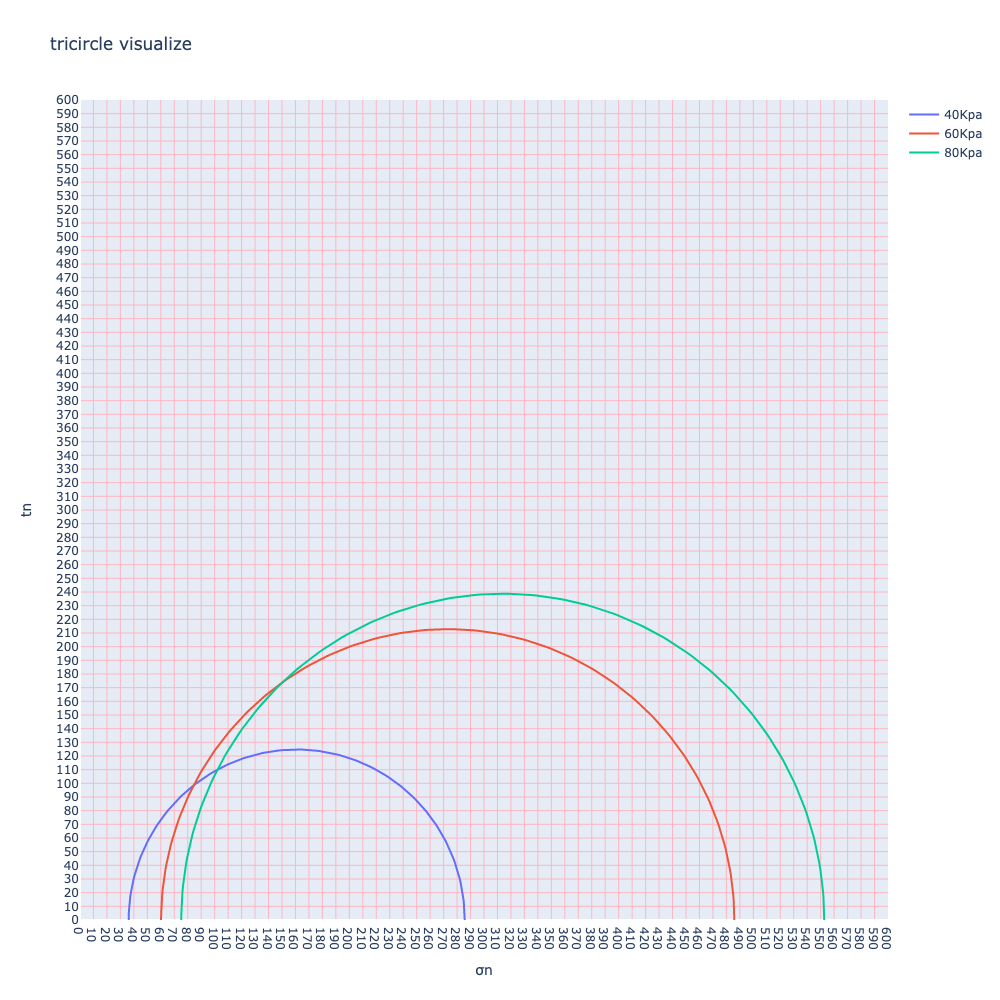

In [48]:
fig.show(renderer="png")

## ploting the circle graph (Effective)

In [49]:
df_conclude2=pd.DataFrame({"data":['40Kpa','60Kpa', '80Kpa']})
df_conclude2['σ1']=''
df_conclude2['σ3']=''
df_conclude2['(σ1-σ3)/2']=''
df_conclude2['(σ1+σ3)/2']=''
df_conclude2.set_index('data',inplace= True)
df_conclude2

σ1 σ3 (σ1-σ3)/2 (σ1+σ3)/2
data                           
40Kpa                          
60Kpa                          
80Kpa

In [50]:
df_conclude2.at['40Kpa', 'σ1'] = df_peak1.at['Total', 'σ1']
df_conclude2.at['60Kpa', 'σ1'] = df_peak2.at['Total', 'σ1']
df_conclude2.at['80Kpa', 'σ1'] = df_peak3.at['Total', 'σ1']
df_conclude2.at['40Kpa', 'σ3'] = df_peak1.at['Total', 'σ3']
df_conclude2.at['60Kpa', 'σ3'] = df_peak2.at['Total', 'σ3']
df_conclude2.at['80Kpa', 'σ3'] = df_peak3.at['Total', 'σ3']
df_conclude2

σ1        σ3 (σ1-σ3)/2 (σ1+σ3)/2
data                                          
40Kpa 291.043731 41.530000                    
60Kpa 490.189994 64.530000                    
80Kpa 562.072593 84.600000

In [51]:
df_conclude2.at['40Kpa', '(σ1-σ3)/2'] = (df_conclude2.at['40Kpa', 'σ1']-df_conclude2.at['40Kpa', 'σ3'])/2
df_conclude2.at['60Kpa', '(σ1-σ3)/2'] = (df_conclude2.at['60Kpa', 'σ1']-df_conclude2.at['60Kpa', 'σ3'])/2
df_conclude2.at['80Kpa', '(σ1-σ3)/2'] = (df_conclude2.at['80Kpa', 'σ1']-df_conclude2.at['80Kpa', 'σ3'])/2
df_conclude2.at['40Kpa', '(σ1+σ3)/2'] = (df_conclude2.at['40Kpa', 'σ1']+df_conclude2.at['40Kpa', 'σ3'])/2
df_conclude2.at['60Kpa', '(σ1+σ3)/2'] = (df_conclude2.at['60Kpa', 'σ1']+df_conclude2.at['60Kpa', 'σ3'])/2
df_conclude2.at['80Kpa', '(σ1+σ3)/2'] = (df_conclude2.at['80Kpa', 'σ1']+df_conclude2.at['80Kpa', 'σ3'])/2
df_conclude2

σ1        σ3  (σ1-σ3)/2  (σ1+σ3)/2
data                                            
40Kpa 291.043731 41.530000 124.756865 166.286865
60Kpa 490.189994 64.530000 212.829997 277.359997
80Kpa 562.072593 84.600000 238.736296 323.336296

In [52]:
df_circle2 = pd.read_csv('circle_template.csv', low_memory=False) #for first data frame 40Kpa
pd.set_option('display.float_format', lambda x:'%f'%x) #set on float
df_circle2

Angle
0        0
1        1
2        2
3        3
4        4
..     ...
177    177
178    178
179    179
180    180
181    181

[182 rows x 1 columns]

In [53]:
df_circle2['σn(40Kpa)']=df_conclude2.at['40Kpa', '(σ1+σ3)/2']+df_conclude2.at['40Kpa', '(σ1-σ3)/2']*np.cos(df_circle2['Angle']*np.pi/180)
df_circle2['tn(40Kpa)']=df_conclude2.at['40Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle2['Angle'])
df_circle2['σn(60Kpa)']=df_conclude2.at['60Kpa', '(σ1+σ3)/2']+df_conclude2.at['60Kpa', '(σ1-σ3)/2']*np.cos(df_circle2['Angle']*np.pi/180)
df_circle2['tn(60Kpa)']=df_conclude2.at['60Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle2['Angle'])
df_circle2['σn(80Kpa)']=df_conclude2.at['80Kpa', '(σ1+σ3)/2']+df_conclude2.at['80Kpa', '(σ1-σ3)/2']*np.cos(df_circle2['Angle']*np.pi/180)
df_circle2['tn(80Kpa)']=df_conclude2.at['80Kpa', '(σ1-σ3)/2']*np.sin(np.pi/180*df_circle2['Angle'])
df_circle2

Angle  σn(40Kpa)  tn(40Kpa)  σn(60Kpa)  tn(60Kpa)  σn(80Kpa)  tn(80Kpa)
0        0 291.043731   0.000000 490.189994   0.000000 562.072593   0.000000
1        1 291.024730   2.177308 490.157579   3.714396 562.036232   4.166523
2        2 290.967732   4.353952 490.060344   7.427660 561.927161   8.331777
3        3 290.872756   6.529270 489.898318  11.138661 561.745413  12.494492
4        4 290.739830   8.702599 489.671551  14.846270 561.491043  16.653402
..     ...        ...        ...        ...        ...        ...        ...
177    177  41.700975   6.529270  64.821676  11.138661  84.927180  12.494492
178    178  41.605999   4.353952  64.659650   7.427660  84.745432   8.331777
179    179  41.549001   2.177308  64.562415   3.714396  84.636361   4.166523
180    180  41.530000   0.000000  64.530000   0.000000  84.600000   0.000000
181    181  41.549001  -2.177308  64.562415  -3.714396  84.636361  -4.166523

[182 rows x 7 columns]

In [54]:
df_circle2.describe()

Angle  σn(40Kpa)  tn(40Kpa)  σn(60Kpa)  tn(60Kpa)  σn(80Kpa)  \
count 182.000000 182.000000 182.000000 182.000000 182.000000 182.000000   
mean   90.500000 165.601493  78.535953 276.190780 133.979053 322.024758   
std    52.683014  88.941694  39.207091 151.730812  66.885658 170.199937   
min     0.000000  41.530000  -2.177308  64.530000  -3.714396  84.600000   
25%    45.250000  76.925825  46.734744 124.913798  79.727520 152.333893   
50%    90.500000 165.198212  87.439913 275.502799 149.168837 321.253035   
75%   135.750000 254.115035 114.839300 427.191183 195.911045 491.405379   
max   181.000000 291.043731 124.756865 490.189994 212.829997 562.072593   

       tn(80Kpa)  
count 182.000000  
mean  150.287381  
std    75.027179  
min    -4.166523  
25%    89.432191  
50%   167.326110  
75%   219.757919  
max   238.736296

In [55]:
import plotly.graph_objects as go


# Create figure
fig = go.Figure()


fig.add_trace(
    go.Scatter(
        x=df_circle2['σn(40Kpa)'], 
        y=df_circle2['tn(40Kpa)'],
        mode="lines",
        name="40Kpa",
        line=dict(
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=df_circle2['σn(60Kpa)'], 
        y=df_circle2['tn(60Kpa)'],
        mode="lines",
        name="60Kpa",
        line=dict(
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=df_circle2['σn(80Kpa)'], 
        y=df_circle2['tn(80Kpa)'],
        mode="lines",
        name="80Kpa",
        line=dict(
        )
    )
)


# Add figure title
fig.update_layout(
    title_text="tricircle visualize",
    
)

# Set x-axis title
fig.update_xaxes(title_text="σn")

# Set y-axes titles
fig.update_yaxes(title_text="tn")

fig.update_xaxes(range=[0, 600])
fig.update_yaxes(range=[0, 600])

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

fig.update_xaxes(tick0=10, dtick=10)
fig.update_yaxes(tick0=10, dtick=10)


fig.show()

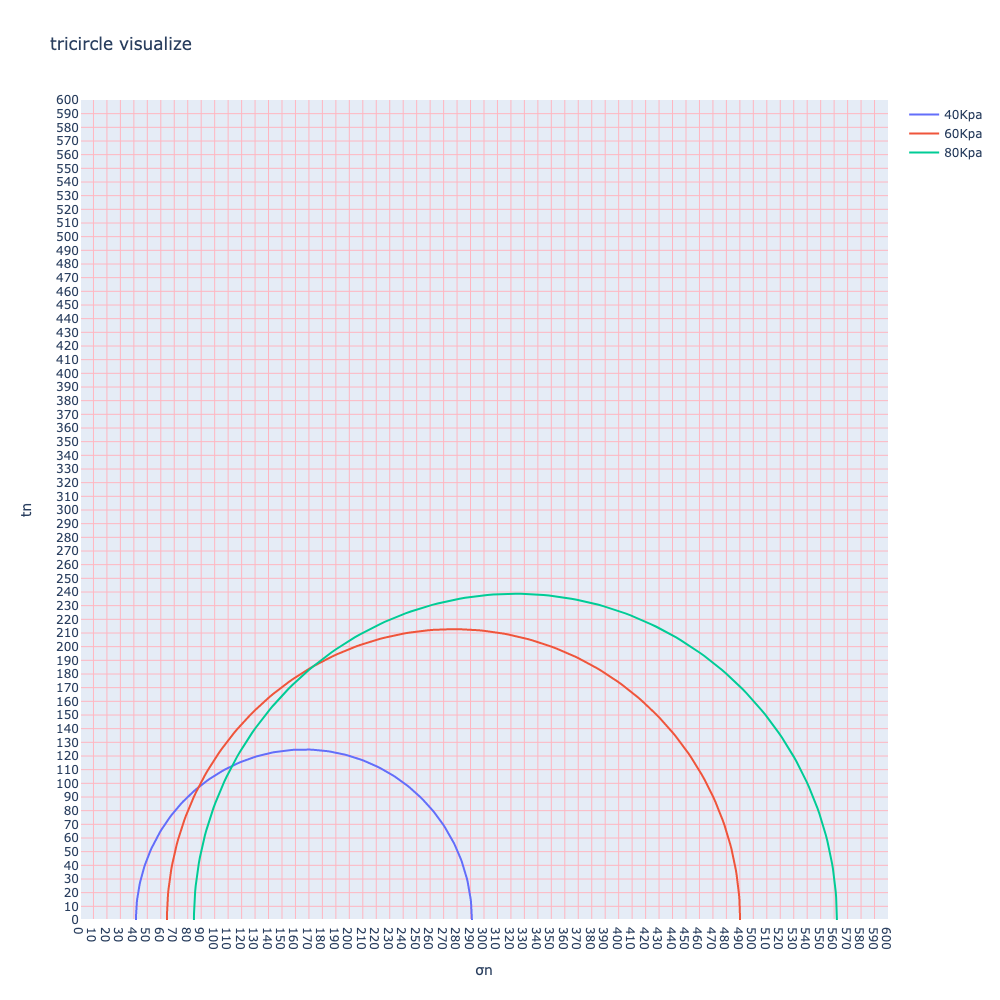

In [56]:
fig.show(renderer="png")